# Final Project - Week 4&5 Submission
### Data Cleaning and Quality Assessment
#### Due: Tuesday, November 26, 2024 at 11:59 PM





#### Submission Requirements:
- Submit a Jupyter notebook (.ipynb) or PDF containing:
  - All code with outputs visible
  - Clear documentation for data selection and initial exploration
    - You can use markdown in Jupyter notebook, or write your final summary in Word/PDF. If you choose Word/PDF, please still submit your notebook/PDF containing the code)<br><br>

    
  
- For individual submission: Include your name in either the filename or within the notebook content
- For team submission: 
  1. Include all team members' names in the notebook content
  2. For team members from different sessions, clearly indicate their session numbers

*Note: Make sure all code cells are executed and outputs are visible in your submission.*

<br>

### Part 1: Dataset Selection 

#### Dataset Source(s) 
<font color="Purple">**Documentation of Dataset Selection:**</font> <font color="Green">**Write a summary (at least one paragraph) that synthesizes all the points below:**</font>
- a. List your chosen dataset(s)
- b. Provide links/sources where the data was obtained
- c. Explain why these datasets are appropriate for your research questions 
- d. Document the time period covered by the data
- e. If applicable, note any usage restrictions or licensing requirements

Sample Oral Image:


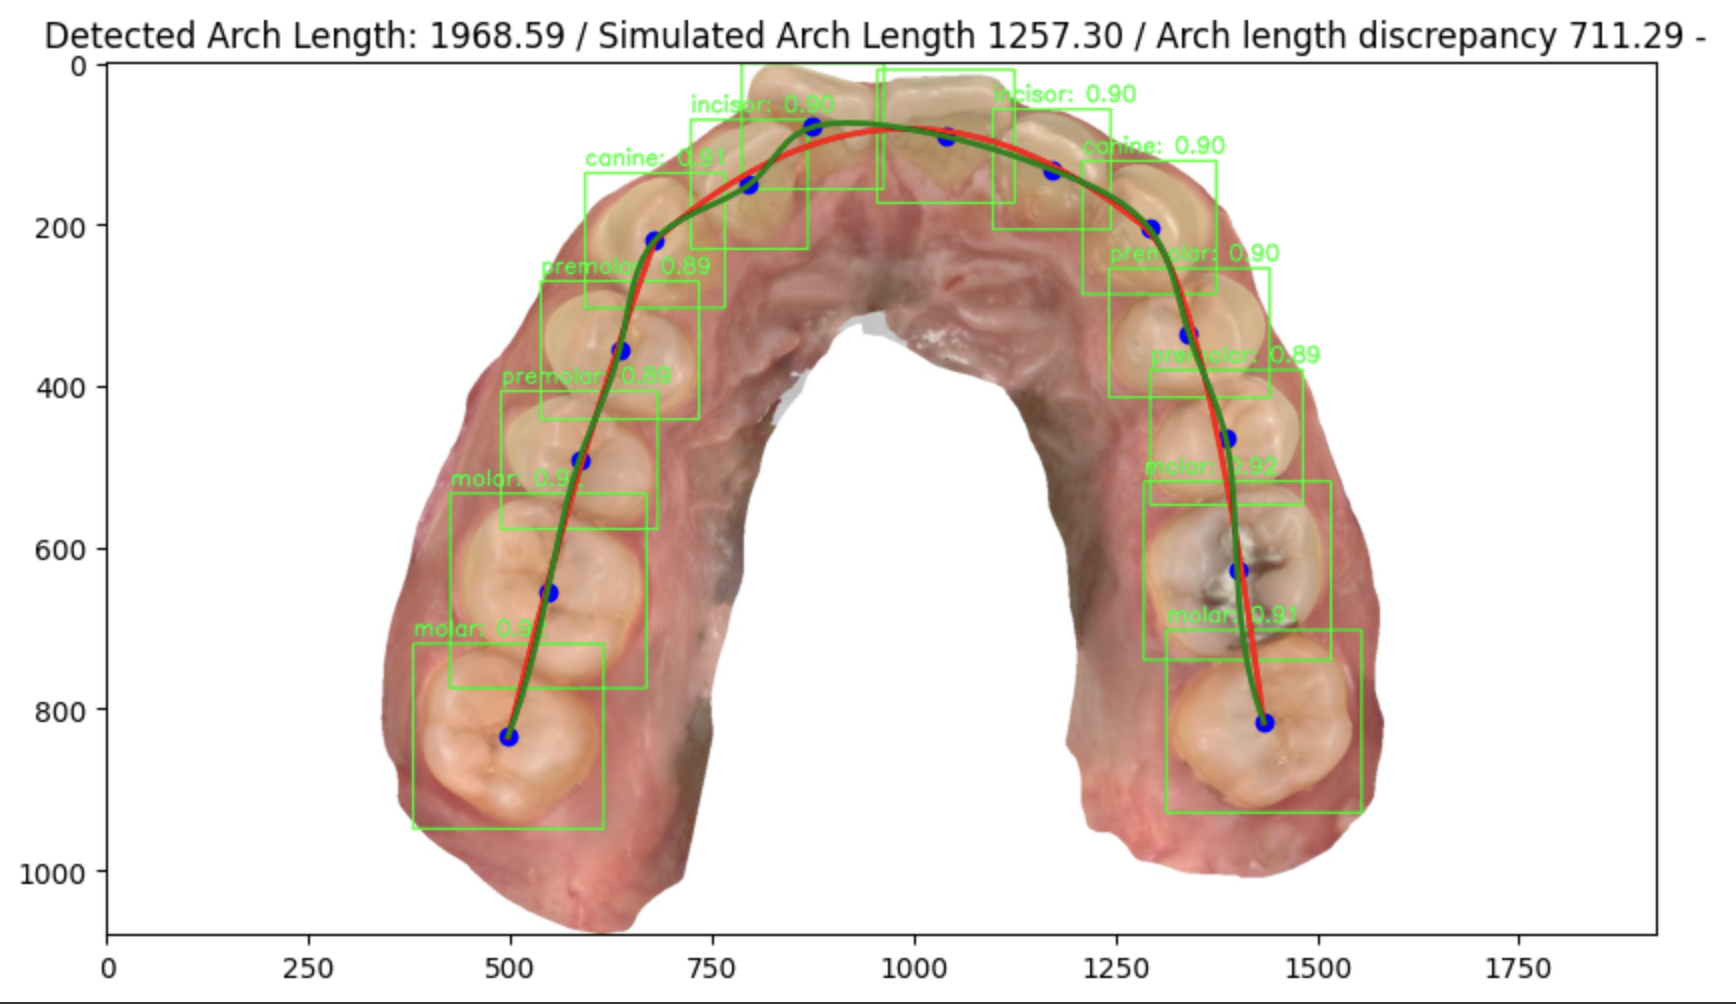

In [1]:
from IPython.display import Image, display
print('Sample Oral Image:')
display(Image(filename='/Users/nkohei/Workspace/McDaniel-Repository/522/final project/image.png'))


For this project, I selected a dataset focused on orthodontic image analysis, specifically involving upper arch images of oral scans categorized into four distinct treatment types.
<br>

I initially applied image processing techniques, including YOLO object detection, to analyze oral images from almost 5,000 patients, captured between December 2023 and January 2024. Through this processing, I identified each tooth, determined the center point for each detected tooth, and constructed both a detected arch and a simulated arch. The dataset includes each patient’s treatment plan, the number of teeth, and detailed measurements of arch length, making it a strong foundation for building a classification model based on these extracted features.
<br>

This comprehensive set of annotated and processed data supports the analysis and classification of orthodontic cases, providing valuable insights and features for model training.

### Part 2: Initial Data Exploration

#### 1. Dataset Structure 


<font color="Purple">**Documentation of Dataset Structure:**</font> Answer the following questions about your dataset:

**1. Dataset Size and Scope**
  - How many observations and variables are in your complete dataset?  
  
  - If using a subset, specify the number of observations and variables you plan to analyze  

**2. Variable Details**
  - List and describe the key variables you plan to use in your analysis (not all variables are required)
    
  - For each selected variable:
    * Provide its name and meaning
    * Indicate whether it is continuous or categorical
  
  [*If you prefer, you can use this table format, or feel free to use any other format*]
  
  | Variable Name | Description | Type (Continuous/Categorical) |
  |--------------|-------------|------------------------------|
  | detected arch length       | the length of detected teeth arch   | Continuous                      |
  | simulated arch length       | the length of simulated teeth arch   | Continuous                      |
  | arch length discrepancy       | the length of detected teeth arch   | Continuous                      |
  | label       | treatment plan   | Categorical                      |
  | num_incisors       | the number of detected incisor   | Continuous                      |
  | num_canines       | the number of detected canine   | Continuous                      |
  | num_premolar       | the number of detected premolar   | Continuous                      |
  | num_molar       | the number of detected molar   | Continuous                      |
  | avg_confidence_incisor       | the confidence of object detection   | Continuous                      |
  | avg_confidence_canine       | the confidence of object detection   | Continuous                      |
  | avg_confidence_premolar       | the confidence of object detection   | Continuous                      |
  | avg_confidence_molar       | the confidence of object detection   | Continuous                      |


**Note**: The below baseline code provides a starting point for your dataset exploration. Feel free to add any other necessary code or practice with additional code you'd like to try.

In [2]:
# Import necessary libraries
import pandas as pd

In [3]:
# Load your dataset
df = pd.read_csv('/Users/nkohei/Workspace/McDaniel-Repository/522/final project/dataset.csv')
df = df.iloc[:,1:]

In [4]:
# Basic dataset information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   detected_arch_length     4999 non-null   float64
 1   simulated_arch_length    4999 non-null   float64
 2   arch_length_discrepancy  4999 non-null   float64
 3   label                    4999 non-null   object 
 4   num_incisors             4999 non-null   int64  
 5   num_canines              4999 non-null   int64  
 6   num_premolars            4999 non-null   int64  
 7   num_molars               4999 non-null   int64  
 8   avg_confidence_incisor   4999 non-null   float64
 9   avg_confidence_canine    4999 non-null   float64
 10  avg_confidence_premolar  4999 non-null   float64
 11  avg_confidence_molar     4999 non-null   float64
dtypes: float64(7), int64(4), object(1)
memory usage: 468.8+ KB


In [5]:
print("\nDataset Shape:")
print(df.shape)


Dataset Shape:
(4999, 12)


In [6]:
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['detected_arch_length', 'simulated_arch_length',
       'arch_length_discrepancy', 'label', 'num_incisors', 'num_canines',
       'num_premolars', 'num_molars', 'avg_confidence_incisor',
       'avg_confidence_canine', 'avg_confidence_premolar',
       'avg_confidence_molar'],
      dtype='object')


In [7]:
print("\nData Types:")
print(df.dtypes)


Data Types:
detected_arch_length       float64
simulated_arch_length      float64
arch_length_discrepancy    float64
label                       object
num_incisors                 int64
num_canines                  int64
num_premolars                int64
num_molars                   int64
avg_confidence_incisor     float64
avg_confidence_canine      float64
avg_confidence_premolar    float64
avg_confidence_molar       float64
dtype: object


<br>

#### 2. Basic Dataset Examination 

Provide:

- Display the first and last 5 records
- Show summary statistics for numerical variables
- Check the number of missing values in your selected variables
- If applicable (for datasets containing categorical variables), check unique values and their frequencies in your categorical variables (you can select a few key categorical variables)
- Note any data quality concerns (e.g., unexpected values, outliers, inconsistencies, potential errors)
  
**Note**: The below baseline code provides a starting point for your dataset exploration. Feel free to add any other necessary code or practice with additional code you'd like to try.

<font color="Purple">**Documentation of Initial Exploration:**</font>
<font color="Green">**After conducting your initial data exploration using pandas, write a summary (at least one paragraph) about your findings.**</font>

In [8]:
# Display last few records
print("\nLast 5 records:")
df.tail()


Last 5 records:


,detected_arch_length,simulated_arch_length,arch_length_discrepancy,label,num_incisors,num_canines,num_premolars,num_molars,avg_confidence_incisor,avg_confidence_canine,avg_confidence_premolar,avg_confidence_molar
4994,2053.229711,1969.037121,84.192589,basic,4,2,4,5,0.890789,0.905070,0.896479,0.908448
4995,1941.495662,1853.592013,87.903649,basic,4,2,4,4,0.893119,0.899692,0.893363,0.908932
4996,1936.642487,1851.329048,85.313439,basic,4,2,4,4,0.893799,0.898978,0.898451,0.904503
4997,1758.360865,1715.296808,43.064058,basic,4,2,4,4,0.878599,0.898116,0.900133,0.919146
4998,2016.275771,1958.795191,57.480580,basic,4,2,4,4,0.895968,0.894760,0.912426,0.916070


In [9]:
# Display basic summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,detected_arch_length,simulated_arch_length,arch_length_discrepancy,num_incisors,num_canines,num_premolars,num_molars,avg_confidence_incisor,avg_confidence_canine,avg_confidence_premolar,avg_confidence_molar
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2027.210926,1910.274185,116.936741,4.009602,2.002601,3.937588,4.347069,0.890159,0.891537,0.893992,0.901914
std,180.777357,119.658277,152.113052,0.184178,0.102944,0.373847,0.740801,0.014209,0.027940,0.019507,0.022138
min,1483.995030,1181.883742,-340.887450,2.000000,0.000000,2.000000,1.000000,0.707018,0.000000,0.682740,0.612709
25%,1936.721860,1841.106782,60.604815,4.000000,2.000000,4.000000,4.000000,0.889075,0.890303,0.893023,0.902096
50%,2013.175583,1912.936002,88.171708,4.000000,2.000000,4.000000,4.000000,0.892319,0.894946,0.897168,0.907146
75%,2092.756692,1979.493273,123.703895,4.000000,2.000000,4.000000,5.000000,0.895323,0.899067,0.901093,0.911398
max,4085.937285,2828.713413,1970.488742,6.000000,4.000000,7.000000,7.000000,0.908154,0.917876,0.925435,0.931001


In [10]:
# To see unique values
print("Unique values in label:")
df['label'].unique()

Unique values in label:


array(['invisalign', 'basic', 'pro', 'regrettable'], dtype=object)

In [11]:
# To see frequencies (value counts)
print("\nValue counts in label:")
df['label'].value_counts()


Value counts in label:


label
basic          3173
regrettable     630
pro             626
invisalign      570
Name: count, dtype: int64

In [12]:
# To see frequencies with percentages
print("\nValue counts with percentages:")
df['label'].value_counts(normalize=True)


Value counts with percentages:


label
basic          0.634727
regrettable    0.126025
pro            0.125225
invisalign     0.114023
Name: proportion, dtype: float64

## Week 5

I encourage you to build upon last week's assignment and complete this week's work in the same Jupyter notebook. Please make sure to clearly label the part numbers. Alternatively, you can paste your work from last week into this notebook so that the data overview from the previous week is visible. This will allow you to refine and improve both weeks' work, making it more organized and cohesive.

### Part 1: Missing Value Analysis
Before we begin working with Python to handle missing values, I’d like to briefly review the methods for handling missing data, as a refresher from your previous statistics courses. In fact, missing values is a vast topic, with many different methods for dealing with them, depending on factors such as sample size, the purpose of the analysis, and the nature of the data. In this assignment, we will focus on practicing several common and straightforward methods using Python to handle missing values. (You can choose any one of the following methods to handle missing values.)
#### 1. Missing Value Assessment

We first need to identify which variables or data points contain missing values. Common markers for missing values include NaN, null, None, or special numeric values (e.g., -9999), and even special symbols like "?" or similar. Sometimes, missing values are also classified by us, for instance, when we encode rare categories like "not sure" or "prefer not to answer" as missing values. Therefore, the first step is to check the dataset for these markers to identify which missing values need to be handled.

*Here is some basic code to check for missing values. You can refer to this or use other methods if preferred.*

In [13]:
# Check missing values
df.isnull().sum()

detected_arch_length       0
simulated_arch_length      0
arch_length_discrepancy    0
label                      0
num_incisors               0
num_canines                0
num_premolars              0
num_molars                 0
avg_confidence_incisor     0
avg_confidence_canine      0
avg_confidence_premolar    0
avg_confidence_molar       0
dtype: int64

In [14]:
# Calculate percentage of missing values
(df.isnull().sum() / len(df)) * 100

detected_arch_length       0.0
simulated_arch_length      0.0
arch_length_discrepancy    0.0
label                      0.0
num_incisors               0.0
num_canines                0.0
num_premolars              0.0
num_molars                 0.0
avg_confidence_incisor     0.0
avg_confidence_canine      0.0
avg_confidence_premolar    0.0
avg_confidence_molar       0.0
dtype: float64


**Types of missing data:**

- MCAR (Missing Completely at Random): The missing value has no relationship to any values in the dataset, observed or missing.
   - Example: A survey page is accidentally lost due to wind.<br><br>

  
- MAR (Missing at Random): The missingness of the data is related to observed variables but not to the missing values themselves. In other words, missing data can be predicted based on other available information.
   - Example: In a health survey, younger respondents are more likely to skip questions about income, but the missing income data can be predicted based on the respondent's age.<br><br>
- MNAR (Missing Not at Random): The missingness of the data is related to the missing values themselves. In other words, the reason the data is missing depends on the unobserved value, making the missingness non-random.
   - Example: Respondents with lower incomes are more likely to skip the income question. The missingness is related to the income value itself, making it not random (MNAR).

*Understanding the type of missing data helps in choosing the right handling method. For example, MCAR data can generally be safely deleted, while MAR data may require imputation, and MNAR data might need more customized handling methods.*

### 2. Missing Value Treatment
*I have provided some example code that you can try out, but feel free to use other code to handle the missing values in your dataset as well.* 

- **Deletion**
  
    - Listwise Deletion: This method is used when the missing data is Missing Completely at Random (MCAR) and accounts for less than 5% of the total data. It is commonly applied in regression analysis to avoid the impact of missing values in a single feature from affecting the entire analysis.
      
    - Column Deletion: If a particular feature has a large amount of missing data, such that the feature provides little to no useful information, it may be appropriate to delete that column entirely.<br><br>


In [15]:
# 1. Listwise Deletion (Drop entire rows)
df_cleaned = df.dropna()

# # 2. Column Deletion (If >50% missing)
# columns_to_drop = missing_percent[missing_percent > 50].index
# df_cleaned = df.drop(columns=columns_to_drop)

- We can also use **simple imputation methods** to handle missing values. Here's when to use each method:
  
   - Mean: When the data is normally distributed.
   - Median: When the data is skewed or contains outliers.
   - Mode: For categorical variables, where the most frequent category is used to fill in missing values.
     
     *Note*: if the proportion of missing data is too high (e.g., >50%), imputation may lead to unreliable results. In such cases, it is better to consider deleting the variable rather than attempting to impute the missing values.

In [16]:
# 1. Numerical Variables
# Mean imputation
df['num_incisors'].fillna(df['num_incisors'].mean())

# Median imputation
df['num_incisors'].fillna(df['num_incisors'].median())

# 2. Categorical Variables
# Mode imputation
df['num_incisors'].fillna(df['num_incisors'].mode()[0])

0       4
1       4
2       4
3       4
4       4
       ..
4994    4
4995    4
4996    4
4997    4
4998    4
Name: num_incisors, Length: 4999, dtype: int64

- For **time series data**, especially when the positions of missing values are determined by time or sequence, and the values are likely to change little in terms of magnitude, we can use forward fill and backward fill.

  - Forward fill: the missing value is filled with the most recent known value before it. In other words, if a data point is missing at a particular time, we use the value from the previous time point to fill in the missing value.
  - Backward fill: the missing value is filled with the next known value after it. In other words, if a data point is missing at a particular time, we use the value from the next time point to fill in the missing value.

In [17]:
## no time series attribution exists at this dataset

# Forward fill (for time series)
df['num_incisors'].fillna(method='ffill')

# Backward fill
df['num_incisors'].fillna(method='bfill')

/var/folders/t6/jzgwrdks2vq53w20jlljrk840000gn/T/ipykernel_67624/376611088.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['num_incisors'].fillna(method='ffill')
/var/folders/t6/jzgwrdks2vq53w20jlljrk840000gn/T/ipykernel_67624/376611088.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['num_incisors'].fillna(method='bfill')


0       4
1       4
2       4
3       4
4       4
       ..
4994    4
4995    4
4996    4
4997    4
4998    4
Name: num_incisors, Length: 4999, dtype: int64

*In addition to the methods mentioned above, there are more complex imputation techniques, such as KNN, multiple imputation, regression, and random forest, that can be used to predict missing values. These methods generally provide more accurate results, especially when the dataset is large and the relationships between variables are complex. However, these methods are more complex, so we will not be practicing them in this project.*

<br>

### Part 2: Outlier Detection and Treatment

Handling outliers also depends on the specific situation. For large datasets, statistical methods like IQR or Z-score can be used for batch processing to detect outliers efficiently. However, for small datasets (e.g., n < 100), it is recommended to check suspicious outliers individually and use domain knowledge and context to determine whether they are errors or valid data points. 

Two common statistical methods for outlier detection:

**IQR (Interquartile Range)** Method:

- Defines outliers based on quartiles (Q1 and Q3)
- Outliers are values below Q1-1.5IQR or above Q3+1.5IQR
- More robust for non-normal distributions


**Z-score Method**:

- Based on number of standard deviations from the mean
- Values with |Z-score| > 3 are typically considered outliers
- More suitable for normally distributed data

Once outliers are detected, in this project, we can delete them directly. (Or feel free to try more advanced methods, such as truncating (replacing them with a certain threshold) or applying transformations (such as using a log transformation)).

*Below are reference codes for the IQR and Z-score methods. You can choose either one. If they are not suitable for your dataset, this step can be skipped.*

<Axes: ylabel='detected_arch_length'>

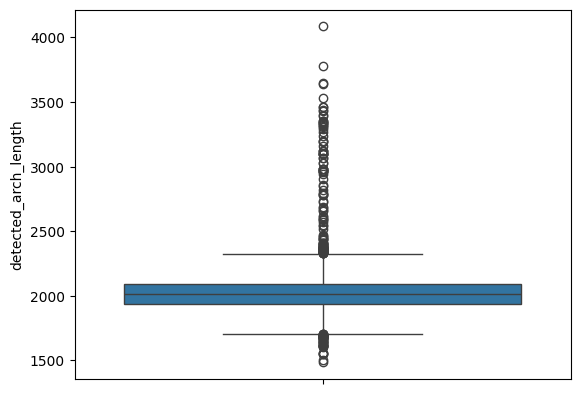

In [18]:
# Statistical measures for outlier detection
Q1 = df['detected_arch_length'].quantile(0.25)
Q3 = df['detected_arch_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Z-score method
# !pip install scipy

from scipy import stats
z_scores = stats.zscore(df['detected_arch_length'])
outliers = abs(z_scores) > 3

df['detected_arch_length_outliers_flg'] = outliers
df[df['detected_arch_length_outliers_flg']]

# Visualizing outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['detected_arch_length'])

<br>

### Part 3: Variable Correlation Analysis
Variable Correlation Analysis serves several important purposes in the data cleaning phase:

Data Quality Check:

- If variables that should be highly correlated show no correlation, it may indicate data errors
- Perfect correlation (coefficient = 1) might suggest duplicate records or derived variables


Reducing Data Redundancy and Feature Selection:

- Helps identify features that have strong relationships with the target variable
- Highly correlated variables (typically >0.9) may contain redundant information, which can lead to multicollinearity issues in regression models.(But some models are not sensitive to multicollinearity, such as tree-based models.)


For example:

- If "age" and "birth year" are highly correlated, we can keep only one
- If "total score" and "average score" are perfectly correlated, it indicates one is derived from the other
- If the correlation between "height" and "weight" is unusual, we may need to check data accuracy

In [19]:
df.head()

,detected_arch_length,simulated_arch_length,arch_length_discrepancy,label,num_incisors,num_canines,num_premolars,num_molars,avg_confidence_incisor,avg_confidence_canine,avg_confidence_premolar,avg_confidence_molar,detected_arch_length_outliers_flg
0,1971.032470,1933.323083,37.709388,invisalign,4,2,4,4,0.893748,0.902704,0.908845,0.915598,False
1,2083.646892,2042.674624,40.972267,basic,4,2,4,5,0.892152,0.893547,0.896210,0.831014,False
2,1816.608868,1705.108935,111.499933,pro,4,2,4,4,0.888458,0.894063,0.894701,0.915506,False
3,1885.302329,1816.008383,69.293946,basic,4,2,4,4,0.887684,0.894043,0.906347,0.913622,False
4,1971.601911,1948.123640,23.478271,basic,4,2,4,4,0.895110,0.900412,0.900419,0.907105,False


In [20]:
# Calculate correlation matrix
correlation = pd.get_dummies(df).corr()
# correlation = df.corr()
print("Correlation Matrix:")
print(correlation)


Correlation Matrix:
                                   detected_arch_length  \
detected_arch_length                           1.000000   
simulated_arch_length                          0.551514   
arch_length_discrepancy                        0.754597   
num_incisors                                   0.147214   
num_canines                                    0.172198   
num_premolars                                  0.111940   
num_molars                                     0.435450   
avg_confidence_incisor                        -0.135067   
avg_confidence_canine                         -0.158681   
avg_confidence_premolar                       -0.026541   
avg_confidence_molar                          -0.173754   
detected_arch_length_outliers_flg              0.681868   
label_basic                                   -0.153460   
label_invisalign                               0.033479   
label_pro                                     -0.034478   
label_regrettable                   

In [21]:
# Find highly correlated pairs
min_threshold = 0.60
max_threshold = 0.99
high_correlation = correlation[correlation > min_threshold]# & correlation < max_threshold]
print("\nHighly correlated variables (>0.9):")
print(high_correlation)


Highly correlated variables (>0.9):
                                   detected_arch_length  \
detected_arch_length                           1.000000   
simulated_arch_length                               NaN   
arch_length_discrepancy                        0.754597   
num_incisors                                        NaN   
num_canines                                         NaN   
num_premolars                                       NaN   
num_molars                                          NaN   
avg_confidence_incisor                              NaN   
avg_confidence_canine                               NaN   
avg_confidence_premolar                             NaN   
avg_confidence_molar                                NaN   
detected_arch_length_outliers_flg              0.681868   
label_basic                                         NaN   
label_invisalign                                    NaN   
label_pro                                           NaN   
label_regrettable  

<br>

#### Optional: Part 4: Additional Data Quality Issues
If the data and variables you are using have other quality issues, such as inconsistent date formats, incorrect data types (e.g., numbers stored as strings), or duplicate records, please address them.

<br>

### <font color="Green"> Part 5: Documentation </font>

Please write at least one paragraph summarizing the issues in your dataset and how you addressed them during the data cleaning process. You can refer to the following points to complete your summary paragraph:

Initial Data Quality Issues

- What missing values did you find?
- Were there any outliers?
- Did you discover any highly correlated variables?
- Were there any other quality issues encountered in this dataset?


Cleaning Process

- How did you handle missing values and why?
- Did you address any outliers? If so, how?
- If applicable, which variables did you remove or combine due to high correlations?
- If applicable, how did you resolve other data quality issues (e.g., formatting inconsistencies, duplicates)?

Final Dataset Characteristics

- How many observations and variables remain after cleaning?
- Is the dataset you have cleaned now suitable for further analysis or modeling?

### Initial data quality Issues
Because this data is generated from image, major missing value will be no detction as result. However, there was no missing values since if object detection don't detect any tooth, it returns 0. 

Regrading outliers, I saw 70 datapoint has outlier out of 4999, because of detected location was extremely wrong. To keep the quality of dataset, we may need to put a new logic to reapply the object detection for those images which has longer distance to next tooth. 

### Cleaning Process
Luckily there was no missing values because of object detection and data handling. While we don't have missing values, we observed outliers. In order to keep the quality of dataset we may apply object detection to those images again, if we still have challenges to those outliers, we will adapt the average filling method per class label. (e.g. average detected arch lendth per label)
In the meantime, we will simply get rid of those outliers from our dataset.

### Final Dataset Characteristics
After removing 70 outliers from dataset, final dataset is 4929 observation. I think this is a good starting point to proceed deep-dive analysis and modeling. 


In [27]:
df_cleaned = df[~df['detected_arch_length_outliers_flg']]

df_cleaned.to_csv('/Users/nkohei/Workspace/McDaniel-Repository/522/final project/cleaned_dataset.csv', index=False)